<a href="https://colab.research.google.com/github/chocozzang/My_Python_Practice/blob/main/%EC%9E%91%EC%97%85_2%EC%9C%A0%ED%98%95_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

iris = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Iris.csv', encoding='utf-8')
iris_data = iris[iris.columns[1:5]]
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.5, metric = 'euclidean', min_samples = 5)
dbscan

DBSCAN()

In [7]:
dbscan.fit(iris_data)
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [8]:
pred = dbscan.fit_predict(iris_data)
pred = pd.DataFrame(pred)
pred.columns = ['predict']
pred.head()

,predict
0,0
1,0
2,0
3,0
4,0


In [9]:
match_data = pd.concat([iris, pred], axis = 1)
match_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,predict
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [11]:
cross = pd.crosstab(match_data['Species'], match_data['predict'])
cross

predict,-1,0,1
Species,,,
Iris-setosa,1,49,0
Iris-versicolor,6,0,44
Iris-virginica,10,0,40


In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2).fit(iris_data)
pca_2d = pca.transform(iris_data)

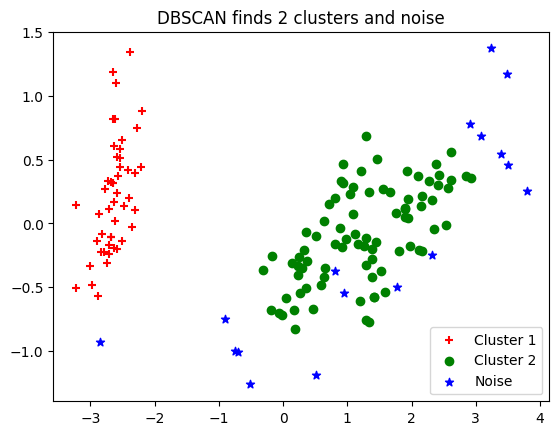

In [15]:
for i in range(0, pca_2d.shape[0]) :
  if dbscan.labels_[i] == 0:
    c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c = 'r', marker = '+')
  elif dbscan.labels_[i] == 1:
    c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c = 'g', marker = 'o')
  elif dbscan.labels_[i] == -1:
    c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c = 'b', marker = '*')
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN finds 2 clusters and noise') 
plt.show()   